# Scikit-Learn course 1
## Convert data to numerical

# I. Getting data ready

## reminder :

1. Get data ready : 
    - `df = pd.read_csv()`
    - `y = df.data_y`
    - `X = df.drop("data_y",axis=1)`
    - `X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)`
        
2. Chose model, train and evaluate  :
    - `clf = RandomForestClassifier()`
    - `clf.fit(X_train, y_train)`
    - `y_preds = clf.predict(X_test)`
    - `clf.score(X_test, y_test) or accuracy_score(y_test, y_preds)`

3. Improve model : modify hyperparameters
    - `clf.get_params()`
    - ex : chose the best n_estimators by testing
        
4. Save and load model :
    - `pickle.dump(clf,open(path,"wb"))`
    - `loaded_model = pickle.load(open(path,"rb"))`
    - `loaded_model.score(X_test, y_test)`

        

![.](images/sklearn-workflow.png)

![.](images/Features-and-Labels-in-a-Dataset-i2tutorials.png)

## Features = Data
## Label = Target

## 0. Standards import 

In [13]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.ensemble import RandomForestRegressor

In [14]:
# ---> y (axis=1)
# |
# |
# x (axis=0)


Three main things we have to do :
- 1. Split data into feature and labels (usually `X`and `y`)
- 2. Filling (also call imputing) or disregarding missing values
- 3. Converting non-numerical values to numerical (also call feature encoding)
    - Clean data
    - Transform data
    - Reduce data

## 1. Getting data ready to be used with machine learning

In [15]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [16]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [17]:
car_sales.Make.value_counts()

Toyota    398
Honda     304
Nissan    198
BMW       100
Name: Make, dtype: int64

In [18]:
car_sales.Doors.value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [19]:
car_sales.Colour.value_counts()

White    407
Blue     321
Black     99
Red       94
Green     79
Name: Colour, dtype: int64

In [20]:
# Split into X/y
y = car_sales.Price
X = car_sales.drop("Price",axis=1)

# Split into training and testing data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) # 20% data for testing

## 2. Encoder exemple

In [50]:
from sklearn.preprocessing import LabelEncoder

y1 = np.array(["dog", "cat", "bird", "cat", "dog"])

encoder1 = LabelEncoder()
encoder1.fit_transform(y1)

array([2, 1, 0, 1, 2])

In [52]:
encoder1.inverse_transform(np.array([2, 1, 0, 1, 2]))

array(['dog', 'cat', 'bird', 'cat', 'dog'], dtype='<U4')

In [59]:
from sklearn.preprocessing import OrdinalEncoder

X = np.array([["dog", "cat"], 
              ["bird", "cat"], 
              ["bigcat", "rabbit"]])

encoder2 = OrdinalEncoder()
encoder2.fit_transform(X)

# Warning here : first vector ["dog", "bird", "bigcat"] -> [2., 1., 0.]

array([[2., 0.],
       [1., 0.],
       [0., 1.]])

**Probeme : 2.> 1.> 0. BUT not "dog" > "bird" > "bigcat"**
<br>
We want to avoid that except for the `RandomForest` that arent effect by that probleme

In [60]:
from sklearn.preprocessing import LabelBinarizer

y1 = np.array(["dog", "cat", "bird", "cat", "dog"])

encoder1 = LabelBinarizer()
encoder1.fit_transform(y1)

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

**If they is a lot of category the matrix will be huge, you can minimize is using `sparse_output=True`**

In [57]:
from sklearn.preprocessing import OneHotEncoder

y2 = pd.DataFrame()
y2["animal"] = ["dog", "cat", "bird", "cat", "dog"]

encoder3 = OneHotEncoder() # by default `sparse_output=True`
pd.DataFrame(encoder3.fit_transform(y2))

,0
0,"(0, 2)\t1.0"
1,"(0, 1)\t1.0"
2,"(0, 0)\t1.0"
3,"(0, 1)\t1.0"
4,"(0, 2)\t1.0"


## 3. Transform Data

### 3.1 Transform using sklearn

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ("Make","Colour","Doors")
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],
                               remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X_df = pd.DataFrame(transformed_X)
transformed_X_df

# ColumnsTransformer use OneHotEncoder that we create and apply it to the categorical_features
# and for the remain columns that he found, passthrough

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


What `OneHotEncoder` do :
![.](images/One-Hot-Encoding-for-Scikit-Learn-in-Python-Explained-1024x576.png)

###### in this case : 
- 4 differents elements in `Make` :
    - Toyota (398)
    - Honda  (304)
    - Nissan (198)
    - BMW    (100)
- 3 diffetents elements in `Doors` :
    - 4 (856)
    - 5 (79)
    - 3 (65)
- 5 differents elements in `Colour` :
    - White    (407)
    - Blue     (321)
    - Black     (99)
    - Red       (94)
    - Green     (79)
        
Then 4 + 3 +5 = 12 new columns insteed of the previous 2 <br>
(X DataFrame doesn't have Price columns)
<br><br>
And because of `remainder="passthrough"`, `Odometer (KM)` doesn't change
<br>
Note : `Doors` is already numerical so it's not necessary

### 3.2 Transform data using pandas :
`.get_dummies`

In [22]:
dummies_X = pd.get_dummies(X[["Make","Colour","Doors","Odometer (KM)"]])
dummies_X

,Doors,Odometer (KM),Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,35431,0,1,0,0,0,0,0,0,1
1,5,192714,1,0,0,0,0,1,0,0,0
2,4,84714,0,1,0,0,0,0,0,0,1
3,4,154365,0,0,0,1,0,0,0,0,1
4,3,181577,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,4,35820,0,0,0,1,1,0,0,0,0
996,3,155144,0,0,1,0,0,0,0,0,1
997,4,66604,0,0,1,0,0,1,0,0,0
998,4,215883,0,1,0,0,0,0,0,0,1


## 4. Build machine learning model (after transformed data)

### 4.1 Transformed with sklearn :

In [23]:
def ML_sklearn():
    X_train, X_test, y_train, y_test = train_test_split(transformed_X,y,test_size=0.2)
    model = RandomForestRegressor()
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

ML_sklearn()

0.35665972393085565

### 4.2 Transformed with pandas :

In [24]:
def ML_pandas():
    X_train, X_test, y_train, y_test = train_test_split(dummies_X,y,test_size=0.2)
    model = RandomForestRegressor()
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

ML_pandas()

0.2553796654328573

### 4.3 Conclusion : 
At first see Transformed with sklearn or pandas doesn't affect the result 

## 5. Feature Scaling

### Exemple :

**Normalisation MinMax** : <br>
$$X_{scaled} = {X - X_{min} \over X_{max} - X_{min}}$$

In [61]:
from sklearn.preprocessing import MinMaxScaler

y = np.array([[70], 
              [80], 
              [120]])

scaler = MinMaxScaler()
scaler.fit_transform(y)

array([[0. ],
       [0.2],
       [1. ]])

**Standardisation** : the mean is 0 and the sdt is 1 <br>
$$X_{scaled} = {X - \mu_X \over \sigma_X}$$

In [64]:
from sklearn.preprocessing import StandardScaler

y = np.array([[70], 
              [80], 
              [120]])

scaler = StandardScaler()  
scaler.fit_transform(y)

array([[-0.9258201 ],
       [-0.46291005],
       [ 1.38873015]])

<font color=red>
    dont do StandardScaler or StandardScaler if they is outliers 
</font>

**RobustScaler** : less sensitive to outlier due to the median<br>
$$X_{scaled} = {X - median \over IQR}$$
NOTE : $IQR = Q3 - Q1$ where Q are the quartil

In [63]:
from sklearn.preprocessing import RobustScaler

y = np.array([[70], 
              [80], 
              [120]])

scaler = RobustScaler()
scaler.fit_transform(y)

array([[-0.4],
       [ 0. ],
       [ 1.6]])

### 5.1 Normalization
**NOTE : decision tree doesnt need normalisation**<br>
Normalization (also called min-max scaling) - This rescales all the numerical values to between 0 and 1, with the lowest value being close to 0 and the highest previous value being close to 1. Scikit-Learn provides functionality for this in the MinMaxScalar class.

In [25]:
from sklearn.preprocessing import MinMaxScaler 
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

scaler = MinMaxScaler()
scaler.fit(transformed_X)
transformed_X_min_max = scaler.transform(transformed_X)

def ML_MinMaxScaler():
    X_train, X_test, y_train, y_test = train_test_split(transformed_X_min_max,y,test_size=0.2)
    model = RandomForestRegressor()
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

ML_MinMaxScaler()

0.29786998158912237

In [26]:
pd.DataFrame(transformed_X_min_max).head(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.105472
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.761606
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.311065
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.601626


### 5.2 Standardization
Standardization - This subtracts the mean value from all of the features (so the resulting features have 0 mean). It then scales the features to unit variance (by dividing the feature by the standard deviation). Scikit-Learn provides functionality for this in the StandardScalar class.



In [27]:
from sklearn.preprocessing import StandardScaler
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

scaler = StandardScaler()
scaler.fit(transformed_X)
transformed_X_standard = scaler.transform(transformed_X)
# Can does multiple columns in the same time (ex : doors and Odometer)

def ML_StandardScaler():
    X_train, X_test, y_train, y_test = train_test_split(transformed_X_min_max,y,test_size=0.2)
    model = RandomForestRegressor()
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

ML_StandardScaler()

0.3177591348629508

In [28]:
pd.DataFrame(transformed_X_standard).head(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.333333,1.513101,-0.496873,-0.813099,-0.331478,-0.687571,-0.292876,-0.322107,1.207064,-0.263664,0.410152,-0.292876,-1.389645
1,3.000000,-0.660895,-0.496873,-0.813099,-0.331478,1.454395,-0.292876,-0.322107,-0.828457,-0.263664,-2.438123,3.414415,0.895605
2,-0.333333,1.513101,-0.496873,-0.813099,-0.331478,-0.687571,-0.292876,-0.322107,1.207064,-0.263664,0.410152,-0.292876,-0.673585
3,-0.333333,-0.660895,-0.496873,1.229863,-0.331478,-0.687571,-0.292876,-0.322107,1.207064,-0.263664,0.410152,-0.292876,0.338412


## 6 Comparison

In [30]:
from statistics import mean

score_sklearn = []
score_pandas = []
score_MinMaxScaler = []
score_StandardScaler = []

for i in range(10):
    score_sklearn.append(ML_sklearn())
    score_pandas.append(ML_pandas())
    score_MinMaxScaler.append(ML_MinMaxScaler())
    score_StandardScaler.append(ML_StandardScaler())
    
mean(score_sklearn), mean(score_pandas), mean(score_MinMaxScaler), mean(score_StandardScaler)

(0.2991388508780502,
 0.2736904688781472,
 0.2347125121966707,
 0.24951015786228165)

In [31]:
max(score_sklearn), max(score_pandas), max(score_MinMaxScaler), max(score_StandardScaler)

(0.4262263431118043,
 0.3675087627321252,
 0.3172443480588367,
 0.4051813592810912)

In [32]:
min(score_sklearn), min(score_pandas), min(score_MinMaxScaler), min(score_StandardScaler)

(0.14299829905877282,
 0.1748310079040225,
 0.10615515766364503,
 0.14154022732089144)

In [33]:
np.std(score_sklearn), np.std(score_pandas), np.std(score_MinMaxScaler), np.std(score_StandardScaler)

(0.07383139424395678,
 0.0646911944869682,
 0.06314464858561984,
 0.0696183997625119)

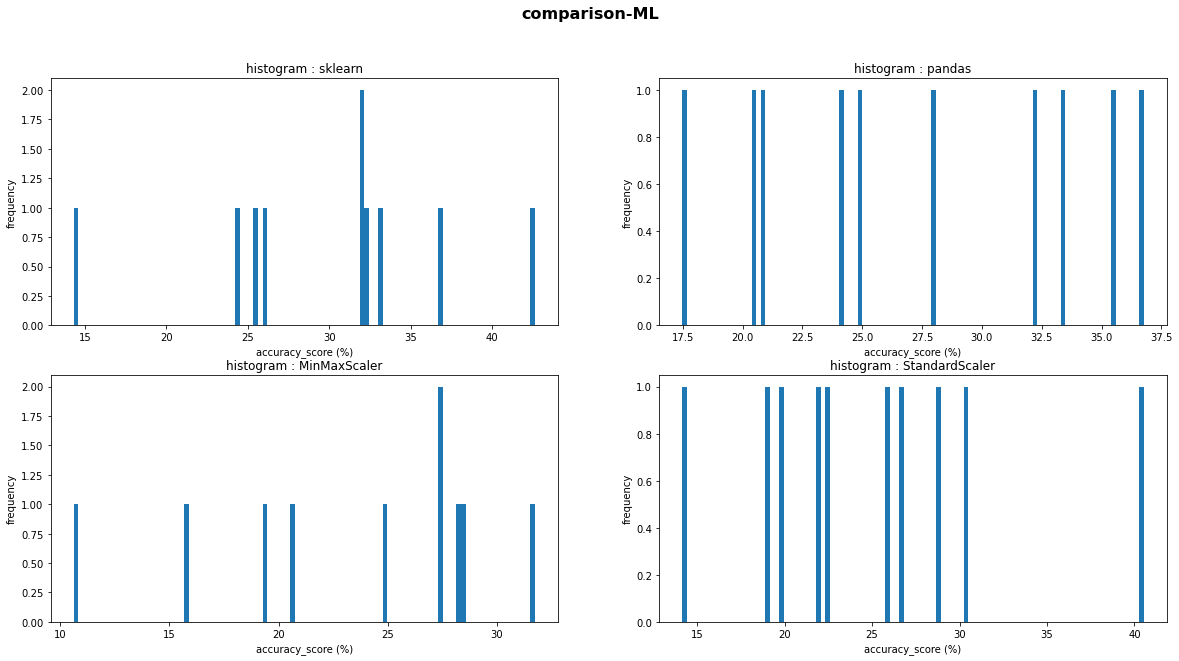

In [34]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(20,10),
                                            ncols=2,
                                            nrows=2
                                           )
ax1.hist(np.array(score_sklearn)*100,bins=100)
ax2.hist(np.array(score_pandas)*100,bins=100)
ax3.hist(np.array(score_MinMaxScaler)*100,bins=100)
ax4.hist(np.array(score_StandardScaler)*100,bins=100)

fig.suptitle("comparison-ML", fontsize=16, fontweight="bold")

ax1.set(title="histogram : sklearn",
      xlabel="accuracy_score (%)",
      ylabel="frequency")
ax2.set(title="histogram : pandas",
      xlabel="accuracy_score (%)",
      ylabel="frequency")
ax3.set(title="histogram : MinMaxScaler",
      xlabel="accuracy_score (%)",
      ylabel="frequency")
ax4.set(title="histogram : StandardScaler",
      xlabel="accuracy_score (%)",
      ylabel="frequency")

fig.savefig("images/comparison_ML.png")